In [5]:
import os
import glob

import numpy as np
import scikit_posthocs as sp # pip3 install scikit-posthocs
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats # pip3 install autorank
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [58]:
cols = [
    # "#52952c",
    "#80d358",
    "#328dee",
    "#d7a532",
    "#d5702e",
    "#b166d0"
]
cmap = lambda i: cols[i]

In [19]:
files_csv = glob.glob('*[mengt].csv')
files_csv = np.sort(files_csv)
print(*files_csv, sep='\n')

banknote_dnn.csv
banknote_svm.csv
banknote_tree.csv
breastcancer_dnn.csv
breastcancer_svm.csv
breastcancer_tree.csv
cifar10_resnet.csv
cifar10_vgg.csv
htru2_dnn.csv
htru2_svm.csv
htru2_tree.csv
mnist_dnn.csv


In [20]:
dfs = []
for file in files_csv:
    df = pd.read_csv(file)
    dfs.append(df)

In [23]:
res = pd.concat(dfs)
res

,data,model,attack,adv_param,defence,acc_no_def_mean,acc_no_def_std,acc_on_adv_mean,acc_on_adv_std,fpr_mean,fpr_std
0,banknote,dnn,apgd,0.05,baard,0.728110,0.025921,0.903750,0.044987,0.008081,0.007618
1,banknote,dnn,apgd,0.05,lid,0.738027,0.015499,0.851955,0.029555,0.044257,0.023421
2,banknote,dnn,apgd,0.05,magnet,0.728110,0.025921,0.676410,0.053168,0.003030,0.006776
3,banknote,dnn,apgd,0.05,rc,0.728110,0.025921,0.732146,0.025208,0.003035,0.004535
4,banknote,dnn,apgd,0.10,baard,0.180034,0.023741,0.637552,0.090355,0.008081,0.007618
...,...,...,...,...,...,...,...,...,...,...,...
120,mnist,dnn,line,1.00,baard,0.973600,0.006387,0.994400,0.002793,0.027200,0.003271
121,mnist,dnn,line,1.00,fs,0.973600,0.006387,0.982400,0.005413,0.052800,0.012558
122,mnist,dnn,line,1.00,lid,0.973600,0.006387,0.973600,0.006387,0.000000,0.000000
123,mnist,dnn,line,1.00,magnet,0.973600,0.006387,0.989200,0.006535,0.002800,0.002168


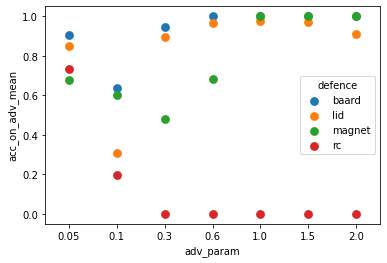

In [30]:
data = res[(res['data'] == 'banknote') & (res['model'] == 'dnn') & (res['attack'] == 'apgd')]
s1 = sns.pointplot(x='adv_param', y='acc_on_adv_mean', hue='defence', data=data, ci='acc_on_adv_std')

In [40]:
def read_baard_results(data, model, attacks):
    list_df = []
    for i in range(5):
        for a in attacks:
            path = os.path.join(
                '..','results', 'result_{}'.format(i), '{}_{}'.format(data, model), 'results', 
                '{}_{}_{}_baard.csv'.format(data, model, a))
            df = pd.read_csv(path)
            df = df.drop('Unnamed: 0', axis=1)
            list_df.append(df)
    df = pd.concat(list_df, axis=0, ignore_index=True)
    df = df.rename(columns={
        'acc_on_adv_3': 'acc_on_adv',
        'fpr_3': 'fpr'
    })
    df['defence'] = 'baard'
    return df[['data', 'model', 'attack', 'adv_param', 'defence', 'acc_no_def', 'acc_on_adv', 'fpr']]

In [42]:
def merge_results(data, model, attacks, defences):
    list_df = []
    for i in range(5):
        for a in attacks:
            for d in defences:
                p_mnist_dnn_apgd2_baard = os.path.join(
                    '..', 'results', 'result_{}'.format(i), '{}_{}'.format(data, model), 'results', 
                    '{}_{}_{}_{}.csv'.format(data, model, a, d))
                df = pd.read_csv(p_mnist_dnn_apgd2_baard)
                df = df.drop('Unnamed: 0', axis=1)
                df['defence'] = d
                list_df.append(df)
    df = pd.concat(list_df, axis=0, ignore_index=True)
    return df

In [46]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2']
defences = ['lid', 'magnet', 'rc']
banknote_dnn = pd.concat([
    read_baard_results('banknote', 'dnn', attacks),
    merge_results('banknote', 'dnn', attacks, defences)
])
banknote_dnn

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr
0,banknote,dnn,fgsm,0.05,baard,0.688442,0.924623,0.0
1,banknote,dnn,fgsm,0.10,baard,0.145729,0.718593,0.0
2,banknote,dnn,fgsm,0.30,baard,0.000000,0.974874,0.0
3,banknote,dnn,fgsm,0.60,baard,0.000000,1.000000,0.0
4,banknote,dnn,fgsm,1.00,baard,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...
340,banknote,dnn,cw2,5.00,magnet,0.000000,0.642857,0.0
341,banknote,dnn,cw2,10.00,magnet,0.000000,0.158163,0.0
342,banknote,dnn,cw2,0.00,rc,0.005102,0.642857,0.0
343,banknote,dnn,cw2,5.00,rc,0.000000,0.000000,0.0


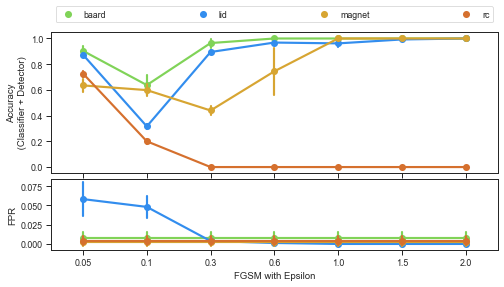

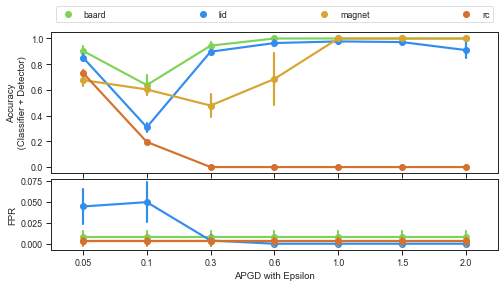

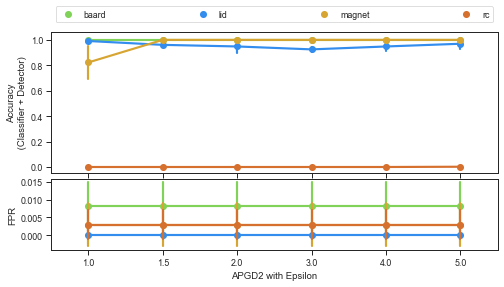

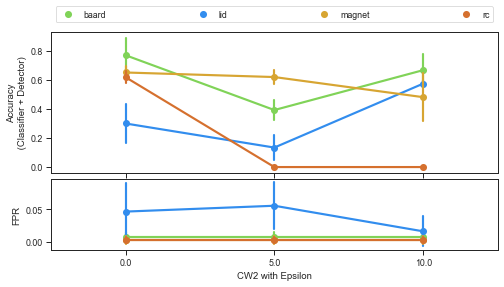

In [68]:
for att in attacks:
    sns.set_style('ticks')
    sns.set_context('paper')
    fig = plt.figure(figsize=(8,4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
    gs.update(hspace=0.05)

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    m = ['^', '^', 'o', '*', 'D', 's']
    l = [':', '-', ':', ':', ':', ':']
    # p = 'Set2'
    p = cols

    data = banknote_dnn[(banknote_dnn['data'] == 'banknote') & (banknote_dnn['model'] == 'dnn') & (banknote_dnn['attack'] == att)]

    s1 = sns.pointplot(x='adv_param', y='acc_on_adv', hue='defence', data=data, ax=ax0, ci='sd', palette=p)
    s1.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])
    s1.legend_.remove()

    s2 = sns.pointplot(x='adv_param', y='fpr', hue='defence', data=data, ax=ax1, ci='sd', palette=p)
    s2.set(ylabel="FPR", xlabel=att.upper() +' with Epsilon')

    plt.legend(bbox_to_anchor=(0., 3.4, 1., .102), loc='upper center', ncol=6, mode="expand" , borderaxespad=0.5)